In [1]:
import geopandas as gpd
import pandas as pd
import boto3

In [4]:
#This shapefile is not in this github repository, but it's basically the 'geojson' of all the dissemination
#areas borders coordinates in Canada. In this part I cutted it down to only the island of Montreal.
shapefile = gpd.read_file('/Users/edinsonjimenezarita/Projects/Real_estate_project/Data/lda_000b21a_e/lda_000b21a_e.shp')

In [2]:
#I will save this file into my S3 bucket to use it in the futur, just in case
s3 = boto3.resource('s3')
bucketname = 'realtor-bucket-edinson'
source_key = 'MTL_map/Quebec_geojson.shp'
destination_filepath = "/Users/edinsonjimenezarita/Projects/Real_estate_project/Data/lda_000b21a_e/lda_000b21a_e.shp"

s3.meta.client.upload_file(destination_filepath, bucketname, source_key)

In [5]:
Quebec = shapefile[shapefile['PRUID'] == '24']

In [6]:
type(Quebec)

geopandas.geodataframe.GeoDataFrame

In [7]:
Quebec.reset_index(drop=True, inplace=True)

In [8]:
Quebec

,DAUID,DGUID,LANDAREA,PRUID,geometry
0,24010018,2021S051224010018,32.2762,24,"MULTIPOLYGON (((8412579.280 1807747.329, 84125..."
1,24010019,2021S051224010019,7.1480,24,"MULTIPOLYGON (((8410453.674 1803532.114, 84104..."
2,24010020,2021S051224010020,24.4604,24,"MULTIPOLYGON (((8397174.929 1779609.040, 83971..."
3,24010021,2021S051224010021,2.9416,24,"POLYGON ((8402057.626 1784177.277, 8402079.000..."
4,24010022,2021S051224010022,3.9757,24,"POLYGON ((8401357.871 1782296.249, 8401355.760..."
...,...,...,...,...,...
13800,24990261,2021S051224990261,7.4501,24,"POLYGON ((7073688.866 2222086.634, 7072687.157..."
13801,24990263,2021S051224990263,282499.8829,24,"MULTIPOLYGON (((6987511.297 2085889.631, 69874..."
13802,24990264,2021S051224990264,96.2223,24,"POLYGON ((7414350.691 1701024.594, 7414348.889..."
13803,24990266,2021S051224990266,213.3539,24,"POLYGON ((7334688.269 1656454.940, 7334800.717..."


In [9]:
Montreal = Quebec[Quebec['DAUID'].str.startswith('2466')]
Montreal.reset_index(drop=True, inplace=True)

In [10]:
Montreal

,DAUID,DGUID,LANDAREA,PRUID,geometry
0,24660001,2021S051224660001,0.3081,24,"MULTIPOLYGON (((7632186.851 1268285.311, 76321..."
1,24660002,2021S051224660002,0.1067,24,"POLYGON ((7631916.654 1267639.486, 7631922.811..."
2,24660003,2021S051224660003,0.0599,24,"POLYGON ((7631962.934 1267729.743, 7631781.297..."
3,24660004,2021S051224660004,0.0823,24,"POLYGON ((7631758.591 1267304.960, 7631796.726..."
4,24660005,2021S051224660005,0.0628,24,"POLYGON ((7632047.437 1267063.994, 7631991.320..."
...,...,...,...,...,...
3223,24663493,2021S051224663493,0.0475,24,"POLYGON ((7633093.583 1244021.440, 7633071.600..."
3224,24663494,2021S051224663494,0.2098,24,"POLYGON ((7623207.506 1245583.311, 7623206.003..."
3225,24663495,2021S051224663495,0.0403,24,"POLYGON ((7622418.289 1245342.769, 7622458.557..."
3226,24663496,2021S051224663496,0.0176,24,"POLYGON ((7623471.114 1244281.851, 7623512.169..."


<Axes: >

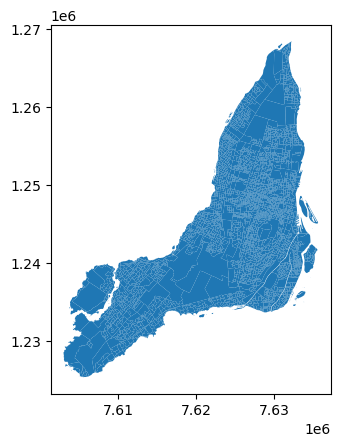

In [11]:
Montreal.plot()

The thing that is missing in this dataset is an unique set of coordinates for every single dissemination area. Probably I can get the center of the multipolygon. Or perhaps the weighted average of the coordinates. The average will be difficult, since I might fall outside the area if I take the average??!

In [13]:
Montreal.set_index('DAUID', inplace=True)

In [15]:
Montreal.drop(['PRUID', 'DGUID'], axis=1, inplace=True)

/var/folders/hj/q5jr6s8s50g6rgdb0hlcrzgw0000gn/T/ipykernel_4096/743549716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Montreal.drop(['PRUID', 'DGUID'], axis=1, inplace=True)


In [17]:
Montreal.head()

,LANDAREA,geometry
DAUID,,
24660001,0.3081,"MULTIPOLYGON (((7632186.851 1268285.311, 76321..."
24660002,0.1067,"POLYGON ((7631916.654 1267639.486, 7631922.811..."
24660003,0.0599,"POLYGON ((7631962.934 1267729.743, 7631781.297..."
24660004,0.0823,"POLYGON ((7631758.591 1267304.960, 7631796.726..."
24660005,0.0628,"POLYGON ((7632047.437 1267063.994, 7631991.320..."


In [18]:
#Has to convert to latitude, longitude projection because plotly can only read that system of coordinates
Montreal.to_crs(crs="EPSG:4326", inplace=True)

/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
filepath = "/Users/edinsonjimenezarita/Projects/MTL_map_AWS/Montreal_geojson.geojson"
Montreal.to_file(filepath, driver = "GeoJSON")
#Note: If I ever want to open this file I have to do this:
# Montreal = gpd.read_file(filepath)

In [20]:
#I will save it also in S3 bucket
source_key2 = 'MTL_map/Montreal_geojson.geojson'
destination_filepath2 = "/Users/edinsonjimenezarita/Projects/MTL_map_AWS/Montreal_geojson.geojson"

s3.meta.client.upload_file(destination_filepath2, bucketname, source_key2)

In [21]:
import plotly.express as px

In [22]:
#Was wondering why the map was not appearing, or not showing the sections, but it happened that I had to enable the notebook rendered
import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [ ]:
fig = px.choropleth_mapbox(Montreal ,geojson=Montreal.geometry, locations=Montreal.index,
        color='LANDAREA', opacity=0.4, mapbox_style='open-street-map', zoom=9,center={'lat': 45.52, 'lon': -73.70}, height=800)
fig.update_geos(fitbounds='locations', visible=False)

Next I will need to find the lattitude and longitude of the center of every single area!

In [24]:
#Just for curiosity
Montreal["Lat_center"] = Montreal.centroid.y
Montreal["Long_center"] = Montreal.centroid.x

/var/folders/hj/q5jr6s8s50g6rgdb0hlcrzgw0000gn/T/ipykernel_4096/3625965864.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hj/q5jr6s8s50g6rgdb0hlcrzgw0000gn/T/ipykernel_4096/3625965864.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/geopandas/

In [25]:
#Have to transform the dtype of index into integer, to avoid compatibility problems with other dataframes that have
#DAUID as integers when doing choropleth maps
Montreal.index = Montreal.index.astype(dtype=int)

In [38]:
Montreal.head()

,LANDAREA,geometry,Lat_center,Long_center
DAUID,,,,
24660001,0.3081,"MULTIPOLYGON (((-73.47712 45.70179, -73.47719 ...",45.694584,-73.483134
24660002,0.1067,"POLYGON ((-73.48273 45.69698, -73.48283 45.696...",45.695846,-73.484164
24660003,0.0599,"POLYGON ((-73.48184 45.69763, -73.48414 45.697...",45.699465,-73.482081
24660004,0.0823,"POLYGON ((-73.48585 45.69453, -73.48544 45.694...",45.693622,-73.485820
24660005,0.0628,"POLYGON ((-73.48322 45.69175, -73.48450 45.690...",45.691833,-73.485121


FROM HERE I WILL TRY THE NEW FORM WITH GEOJSON WITH DATA FROM ANOTHER DATAFRAME

In [27]:
filepath

'/Users/edinsonjimenezarita/Projects/MTL_map_AWS/Montreal_geojson.geojson'

In [39]:
geojson = gpd.read_file(filepath)

In [40]:
geojson.head()

,DAUID,LANDAREA,geometry
0,24660001,0.3081,"MULTIPOLYGON (((-73.47712 45.70179, -73.47719 ..."
1,24660002,0.1067,"POLYGON ((-73.48273 45.69698, -73.48283 45.696..."
2,24660003,0.0599,"POLYGON ((-73.48184 45.69763, -73.48414 45.697..."
3,24660004,0.0823,"POLYGON ((-73.48585 45.69453, -73.48544 45.694..."
4,24660005,0.0628,"POLYGON ((-73.48322 45.69175, -73.48450 45.690..."


In [41]:
type(geojson['DAUID'][0])

str

In [42]:
df = pd.read_csv('/Users/edinsonjimenezarita/Projects/MTL_map_AWS/mtl_pop.csv')

In [43]:
df.head()

,DAUID,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,0 to 14 years,65 years and over,Average age of the population,Median age of the population,Total - Age groups of the population - 100% data
0,24660001,4.6,3.8,2.3,4.6,5.4,6.9,5.4,6.2,12.3,10.0,13.8,25.4,47.4,53.6,100.0
1,24660002,7.4,3.7,4.6,5.6,5.6,4.6,8.3,5.6,9.3,11.1,16.7,16.7,42.4,45.2,100.0
2,24660003,4.9,6.6,6.6,4.9,6.6,6.6,4.9,8.2,9.8,6.6,13.1,19.7,44.0,46.0,100.0
3,24660004,3.7,3.7,3.7,5.6,3.7,5.6,5.6,5.6,11.1,16.7,11.1,25.9,49.2,56.8,100.0
4,24660005,6.4,6.4,0.0,2.1,6.4,8.5,8.5,8.5,14.9,12.8,14.9,14.9,45.2,50.4,100.0


In [44]:
type(df['DAUID'][0])

numpy.int64

In [45]:
#I discover the problem is that you can't mix pandas dataframe with geopandas when geographical plotting. Therefore,
#The only solution was using the json format and replace the gpd by this
import json
with open("/Users/edinsonjimenezarita/Projects/MTL_map_AWS/Montreal_geojson.geojson", encoding='utf-8') as geofile:
    j_file = json.load(geofile)

In [ ]:
fig = px.choropleth_mapbox(df ,geojson=j_file, locations='DAUID', featureidkey='properties.DAUID',
        color='Median age of the population', opacity=0.4, mapbox_style='open-street-map', zoom=9,center={'lat': 45.52, 'lon': -73.70}, height=800)
fig.update_geos(fitbounds='locations', visible=False)